Dataset Shape: (157, 15)

First 5 Rows:
  Manufacturer    Model  Sales_in_thousands Vehicle_type  Price_in_thousands  \
0        Acura  Integra              16.919    Passenger               21.50   
1        Acura       TL              39.384    Passenger               28.40   
2        Acura       CL              14.114    Passenger                 NaN   
3        Acura       RL               8.588    Passenger               42.00   
4         Audi       A4              20.397    Passenger               23.99   

   Engine_size  Horsepower  Wheelbase  Width  Length  Curb_weight  \
0          1.8       140.0      101.2   67.3   172.4        2.639   
1          3.2       225.0      108.1   70.3   192.9        3.517   
2          3.2       225.0      106.9   70.6   192.0        3.470   
3          3.5       210.0      114.6   71.4   196.6        3.850   
4          1.8       150.0      102.6   68.2   178.0        2.998   

   Fuel_capacity  Fuel_efficiency Latest_Launch  Power_perf_fact

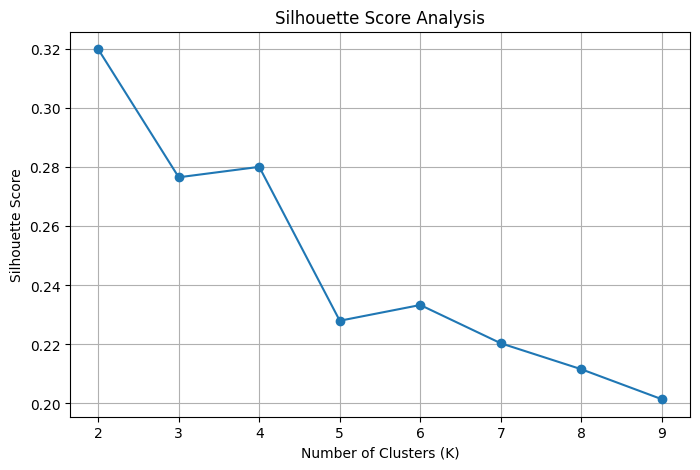

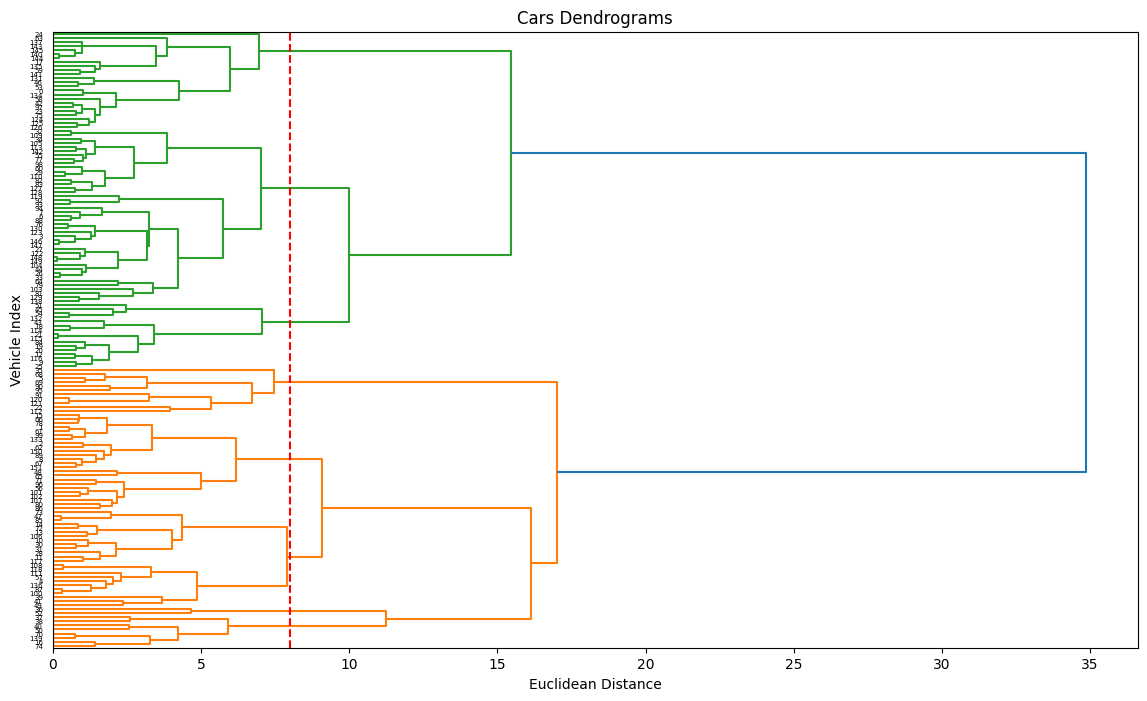

In [3]:
# =========================================================
# Vehicle Dataset – Clustering Evaluation
# Silhouette Score + Hierarchical Dendrogram
# =========================================================

# 1. Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# ---------------------------------------------------------
# 2. Load Dataset
# ---------------------------------------------------------
df = pd.read_csv("ML470_S7_Vehicle_Data_Practice.csv")

print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
print(df.head())

# ---------------------------------------------------------
# 3. Remove Missing Values
# ---------------------------------------------------------
df_clean = df.dropna()

# ---------------------------------------------------------
# 4. Select Numerical Columns
# ---------------------------------------------------------
num_df = df_clean.select_dtypes(include=['int64', 'float64'])

print("\nNumerical Columns Used for Clustering:")
print(num_df.columns.tolist())

# ---------------------------------------------------------
# 5. Feature Scaling
# ---------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(num_df)

# ---------------------------------------------------------
# 6. SILHOUETTE SCORE ANALYSIS (K = 2 to 9)
# ---------------------------------------------------------
silhouette_scores = []

print("\nSilhouette Scores:")
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"K = {k} → Silhouette Score = {score:.4f}")

# ---------------------------------------------------------
# 7. Plot Silhouette Score vs K
# ---------------------------------------------------------
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Analysis")
plt.grid(True)
plt.show()

# ---------------------------------------------------------
# 8. HIERARCHICAL CLUSTERING – WARD LINKAGE
# ---------------------------------------------------------
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(14, 8))
dendrogram(
    linked,
    orientation='right',
    distance_sort='descending',
    show_leaf_counts=True
)

# Threshold line (adjust if needed)
plt.axvline(x=8, color='red', linestyle='--')

plt.title("Cars Dendrograms")
plt.xlabel("Euclidean Distance")
plt.ylabel("Vehicle Index")
plt.show()
